In [1]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pylab import rcParams
# Import a scoring metric to compare methods
from sklearn.metrics import r2_score

from   math              import sqrt
from   sklearn.metrics   import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

C:\Users\Monika\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [2]:
# importing data
import os

rose = pd.read_csv("Rose.csv", parse_dates = True, index_col = 'YearMonth')

In [3]:
rose.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [4]:
rose.isnull().sum()

Rose    2
dtype: int64

In [5]:
rose[rose['Rose'].isnull()]

,Rose
YearMonth,
1994-07-01,NaN
1994-08-01,NaN


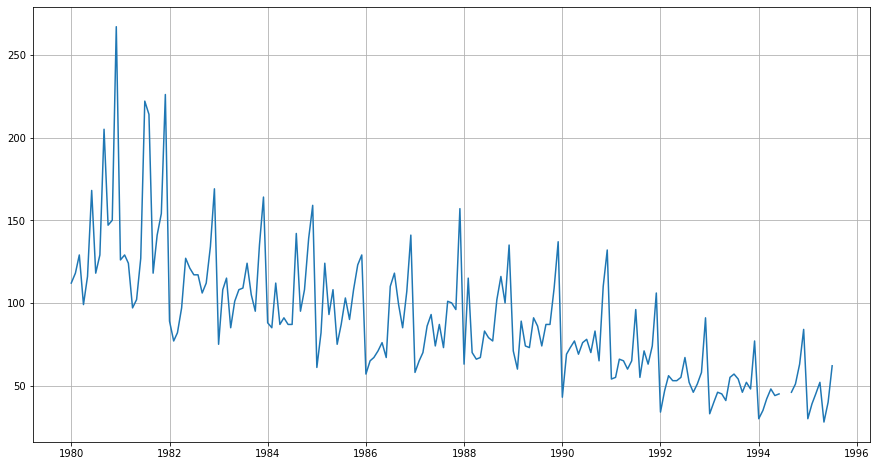

In [6]:
rcParams['figure.figsize'] = 15,8
plt.plot(rose)
plt.grid()

We can observe a downward trend with some seasonality in the sales.

## Yearly Sales Analysis

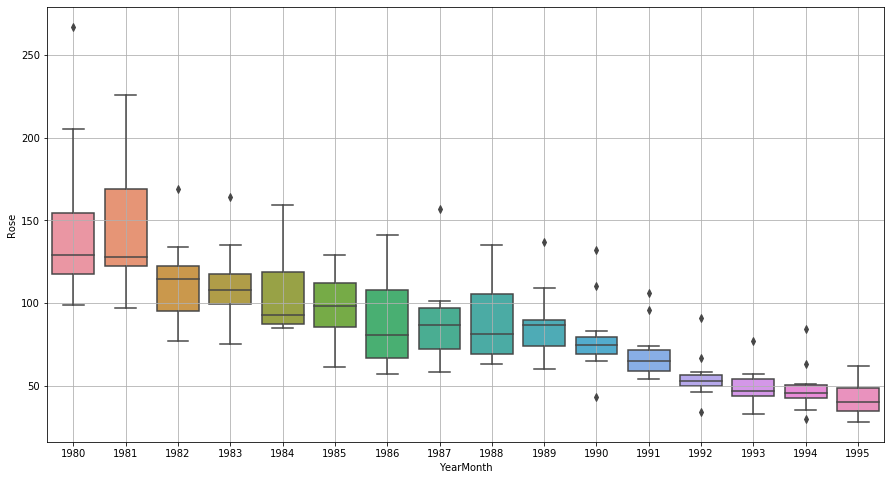

In [7]:
sns.boxplot(x = rose.index.year,y = rose['Rose'])
plt.grid();

Maximum sales were in the year 1981 and minimum in 1995.

## Monthly Sales Analysis

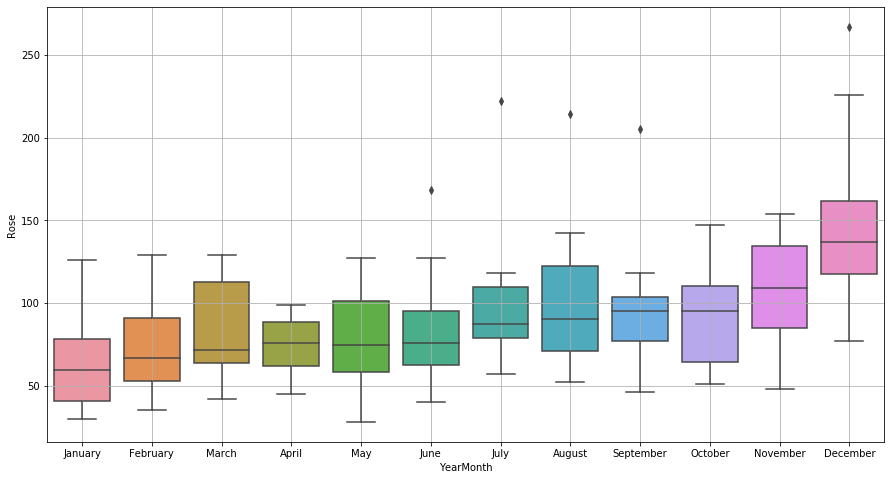

In [8]:
sns.boxplot(x = rose.index.month_name(),y = rose['Rose'])
plt.grid();

Rose Wine sales are maximum in the month of December and minimum in January

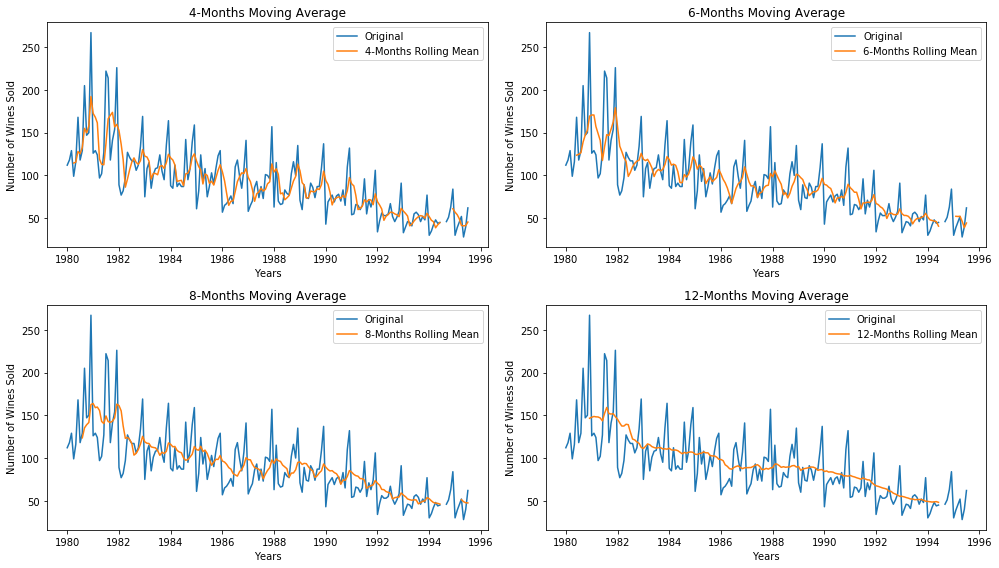

In [9]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(rose.index, rose, label='Original')
axes[0][0].plot(rose.index, rose.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Wines Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(rose.index, rose, label='Original')
axes[0][1].plot(rose.index, rose.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Wines Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(rose.index, rose, label='Original')
axes[1][0].plot(rose.index, rose.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Wines Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(rose.index, rose, label='Original')
axes[1][1].plot(rose.index, rose.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Winess Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

In [10]:
rose[rose['Rose'].isnull()]

,Rose
YearMonth,
1994-07-01,NaN
1994-08-01,NaN


In [11]:
rose.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [12]:
rose=rose.fillna(rose.rolling(4,min_periods=1).mean())

In [13]:
rose.isnull().sum()

Rose    0
dtype: int64

In [14]:
rose.head(2)

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0


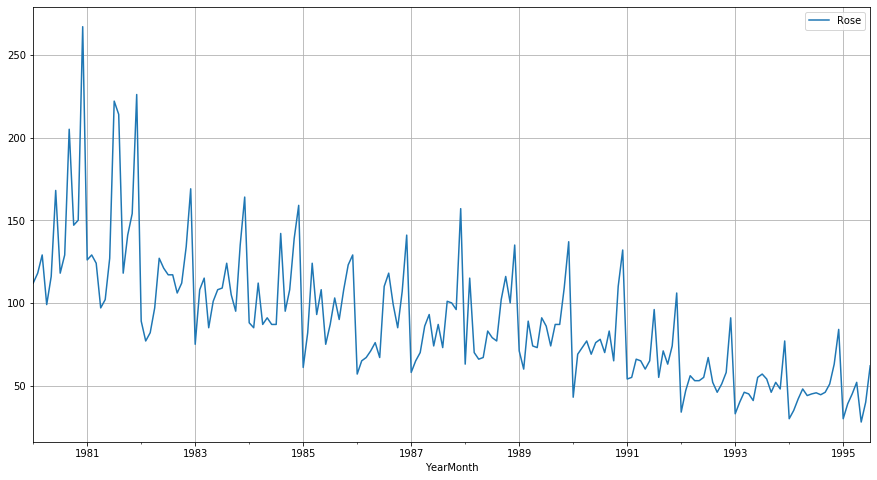

In [15]:
rcParams['figure.figsize'] = 15,8
rose.plot()
plt.grid()

## Decomposing Data

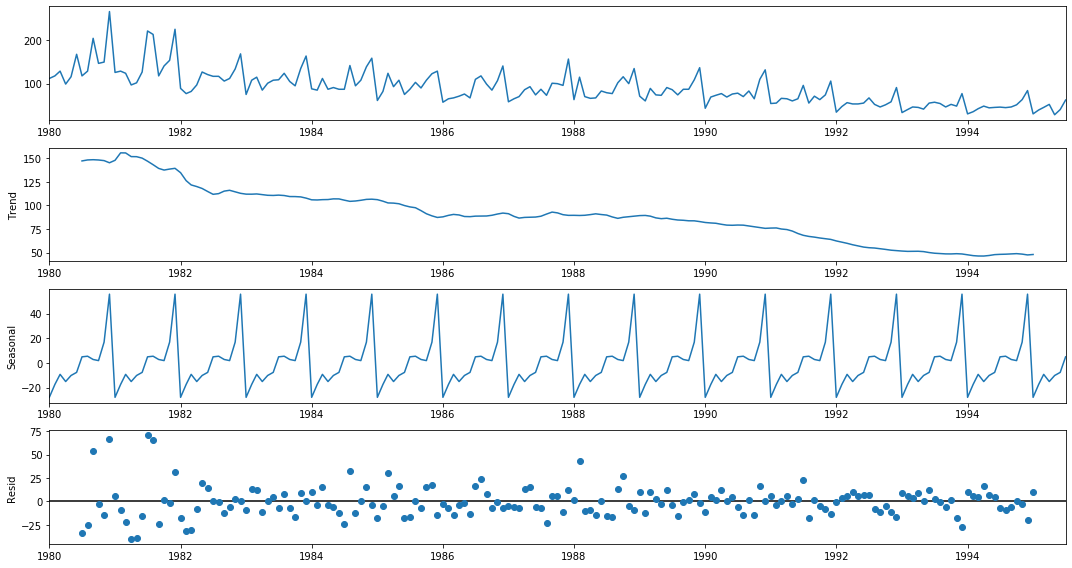

In [16]:
#Additive

decomposition = seasonal_decompose(rose,model='additive')
decomposition.plot();

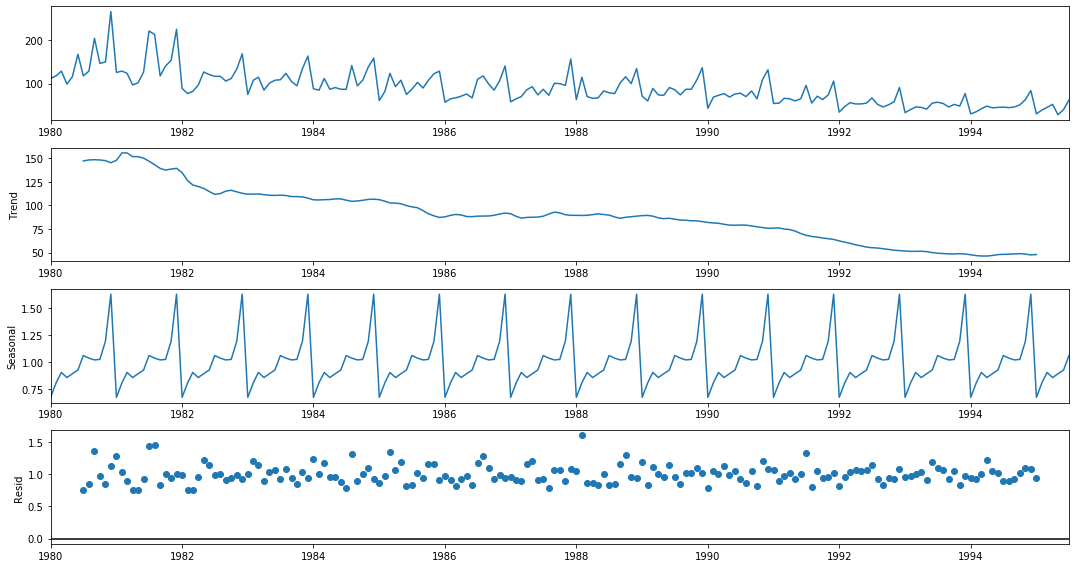

In [17]:
#Multiplicative

decomposition = seasonal_decompose(rose,model='multiplicative')
decomposition.plot();

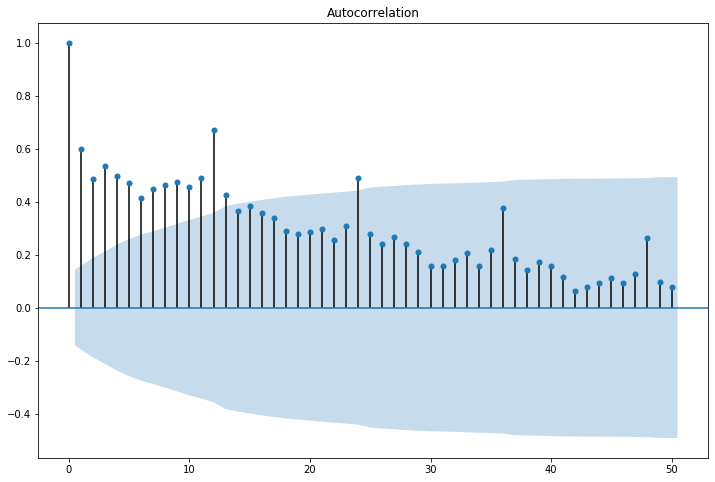

In [18]:
plt.figure(figsize=(12,8))
plot_acf(rose,lags=50,  ax=plt.gca())
plt.show()

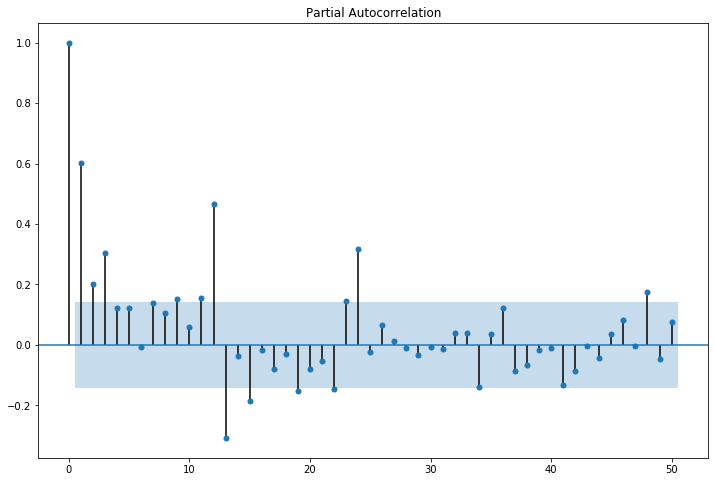

In [19]:
plt.figure(figsize=(12,8))
plot_pacf(rose, lags=50, ax=plt.gca())
plt.show()

In [20]:
train=rose[rose.index.year <1991]
test=rose[rose.index.year >=1991]

In [21]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [22]:
train.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [23]:
test.head()

,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


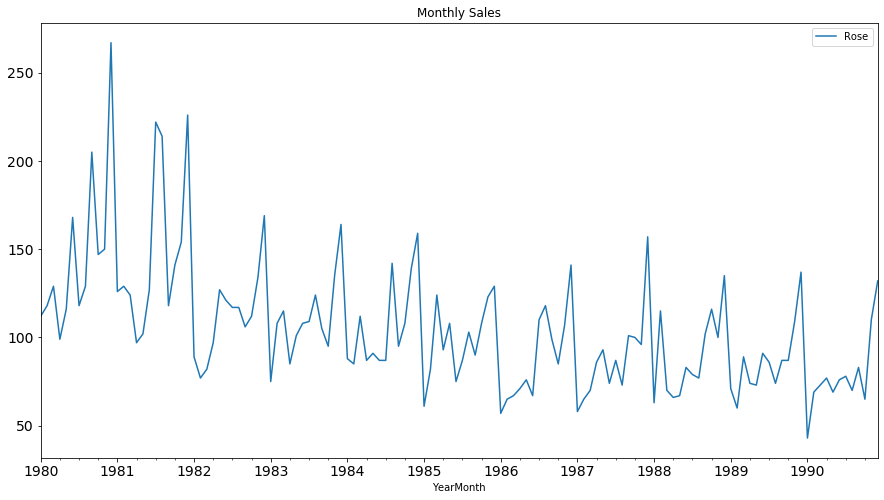

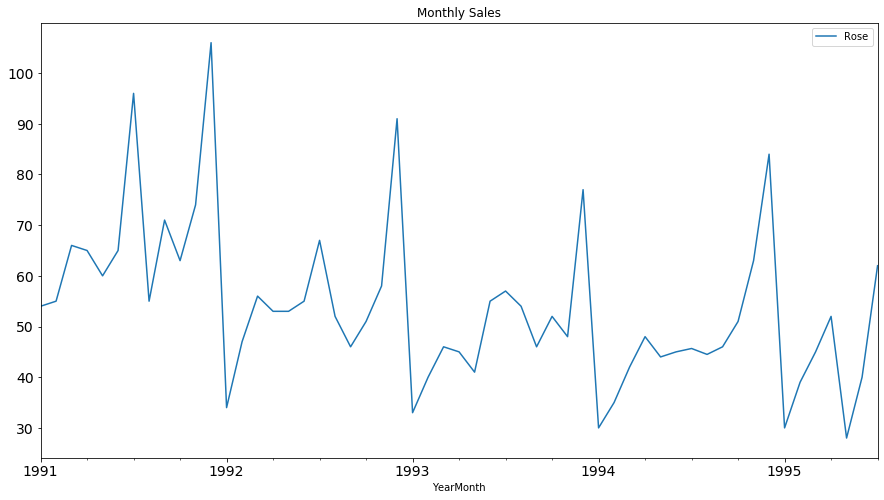

In [24]:
### Plot data

train.plot(figsize=(15,8), title= 'Monthly Sales', fontsize=14)
test.plot(figsize=(15,8), title= 'Monthly Sales', fontsize=14)

## Method 1 - Regression On Time

In [25]:
df=rose.copy()

In [26]:
time = [i+1 for i in range(len(df))]
df['time'] = time

In [27]:
df.head(2)

,Rose,time
YearMonth,,
1980-01-01,112.0,1
1980-02-01,118.0,2


In [28]:
train=df[df.index.year <1991]
test=df[df.index.year >=1991]

In [29]:
x_train = train.drop('Rose',axis=1)
x_test  = test.drop('Rose', axis=1)
y_train = train[['Rose']]
y_test  = test[['Rose']]

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

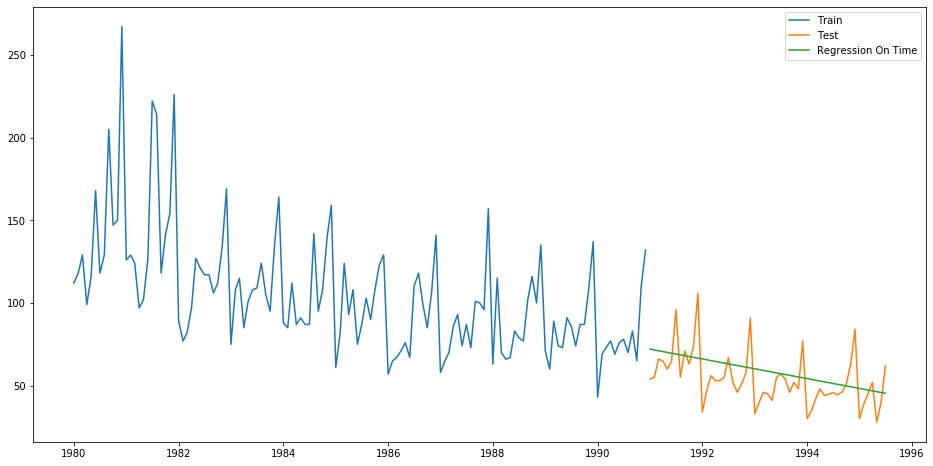

In [33]:
predictions         = lr.predict(x_test)
y_test['RegOnTime'] = predictions

plt.figure(figsize=(16,8))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression On Time')
plt.legend(loc='best')

In [34]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [35]:
rmse = sqrt(mean_squared_error(test.Rose, y_test.RegOnTime))
rmse = round(rmse, 3)
mape = MAPE(test.Rose, y_test.RegOnTime)
print("For RegressionOnTime,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For RegressionOnTime,  RMSE is 15.275 MAPE is 22.85


In [36]:
resultsDf = pd.DataFrame({'Method':['RegressionOnTime'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf

,Method,rmse,mape
0,RegressionOnTime,15.275,22.85


## Method 2: Regression on Time With Seasonal Components

In [37]:
time = [i+1 for i in range(len(rose))]
df = rose.copy()
df['time'] = time
print(df.head())
print(df.shape[0])
monthSeasonality = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']#defining the 12 
#months

             Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5
187


In [38]:
df['monthSeasonality'] = (monthSeasonality * 15) + monthSeasonality[0:7] # it is multiplied by 3 as there are 36 observations
df.head()

,Rose,time,monthSeasonality
YearMonth,,,
1980-01-01,112.0,1,m1
1980-02-01,118.0,2,m2
1980-03-01,129.0,3,m3
1980-04-01,99.0,4,m4
1980-05-01,116.0,5,m5


In [39]:
dfComplete = pd.get_dummies(df)
dfComplete.tail(5).T

YearMonth,1995-03-01,1995-04-01,1995-05-01,1995-06-01,1995-07-01
Rose,45.0,52.0,28.0,40.0,62.0
time,183.0,184.0,185.0,186.0,187.0
monthSeasonality_m1,0.0,0.0,0.0,0.0,0.0
monthSeasonality_m10,0.0,0.0,0.0,0.0,0.0
monthSeasonality_m11,0.0,0.0,0.0,0.0,0.0
monthSeasonality_m12,0.0,0.0,0.0,0.0,0.0
monthSeasonality_m2,0.0,0.0,0.0,0.0,0.0
monthSeasonality_m3,1.0,0.0,0.0,0.0,0.0
monthSeasonality_m4,0.0,1.0,0.0,0.0,0.0
monthSeasonality_m5,0.0,0.0,1.0,0.0,0.0


In [40]:
train=dfComplete[dfComplete.index.year <1991]
test=dfComplete[dfComplete.index.year >=1991]

In [41]:
x_train  = train.drop('Rose', axis=1)
x_test   = test.drop('Rose', axis=1)
y_train  = train[['Rose']]
y_test   = test[['Rose']]

In [42]:
model    = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
y_test['RegOnTimeSeasonal'] = predictions

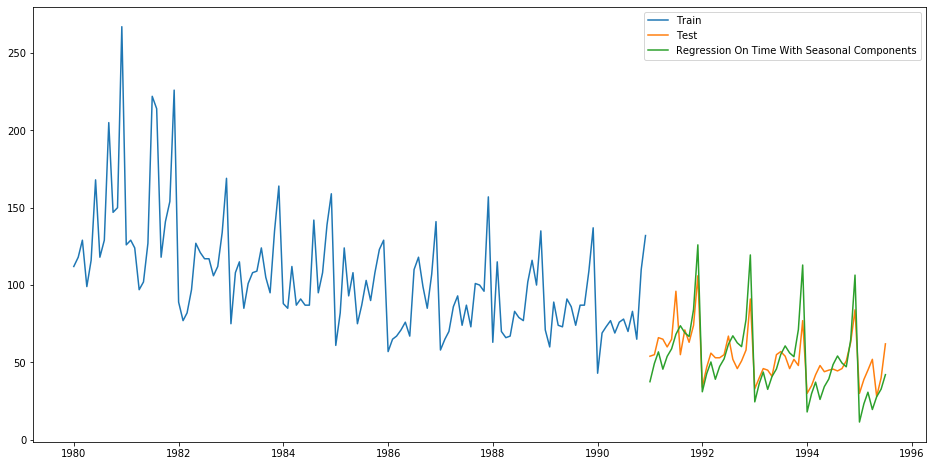

In [43]:
plt.figure(figsize=(16,8))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_test['RegOnTimeSeasonal'], label='Regression On Time With Seasonal Components')
plt.legend(loc='best')

In [44]:
rmse = sqrt(mean_squared_error(test.Rose, y_test.RegOnTimeSeasonal))
rmse = round(rmse, 3)
mape = MAPE(test.Rose, y_test.RegOnTimeSeasonal)
print("For RegOnTimeSeasonal,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For RegOnTimeSeasonal,  RMSE is 13.913 MAPE is 20.35


In [45]:
tempResultsDf = pd.DataFrame({'Method':['RegressionOnTimeSeasonal'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse,mape
0,RegressionOnTime,15.275,22.85
0,RegressionOnTimeSeasonal,13.913,20.35


## Method 3: Naive Approach: $\hat{y}_{t+1} = y_t$

In [46]:
dd= np.asarray(train.Rose)

In [47]:
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]

Text(0.5, 1.0, 'Naive Forecast')

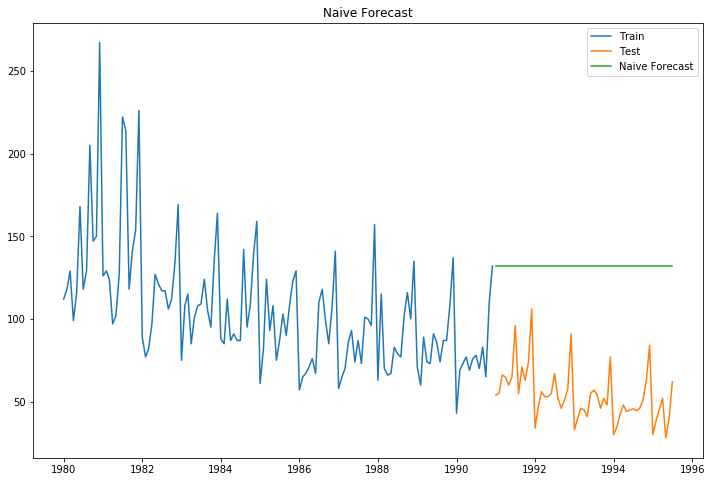

In [48]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Rose'], label='Train')
plt.plot(test.index,test['Rose'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [49]:
rmse = sqrt(mean_squared_error(test.Rose, y_hat.naive))
rmse = round(rmse, 3)
mape = MAPE(test.Rose, y_hat.naive)
print("For Naive model,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For Naive model,  RMSE is 79.735 MAPE is 145.17


In [50]:
tempResultsDf = pd.DataFrame({'Method':['Naive model'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse,mape
0,RegressionOnTime,15.275,22.85
0,RegressionOnTimeSeasonal,13.913,20.35
0,Naive model,79.735,145.17


## Method 4: Simple Average

In [51]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Rose'].mean()

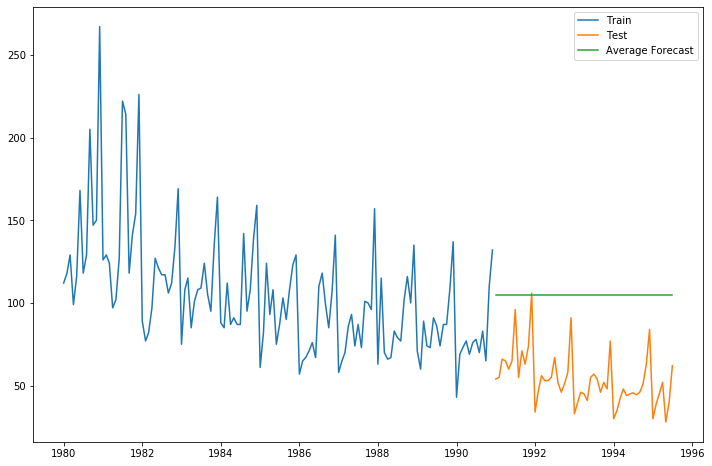

In [52]:
plt.figure(figsize=(12,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

In [53]:
rmse = sqrt(mean_squared_error(test.Rose, y_hat_avg.avg_forecast))
rmse = round(rmse, 3)
mape = MAPE(test.Rose, y_hat_avg.avg_forecast)
print("For Simple Average model,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For Simple Average model,  RMSE is 53.478 MAPE is 94.98


In [54]:
tempResultsDf = pd.DataFrame({'Method':['Simple Average'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse,mape
0,RegressionOnTime,15.275,22.85
0,RegressionOnTimeSeasonal,13.913,20.35
0,Naive model,79.735,145.17
0,Simple Average,53.478,94.98


## Method 5: Moving Average(MA)

In [55]:
df = rose.copy()

In [56]:
df['moving_avg_forecast_4']  = df['Rose'].rolling(4).mean()
df['moving_avg_forecast_6']  = df['Rose'].rolling(6).mean()
df['moving_avg_forecast_8']  = df['Rose'].rolling(8).mean()
df['moving_avg_forecast_12'] = df['Rose'].rolling(12).mean()

For Simple Average model, moving_avg_forecast_4  RMSE is 14.457 MAPE is 19.50
For Simple Average model, moving_avg_forecast_6  RMSE is 14.569 MAPE is 20.83
For Simple Average model, moving_avg_forecast_8  RMSE is 14.802 MAPE is 21.02
For Simple Average model, moving_avg_forecast_12  RMSE is 15.239 MAPE is 22.10


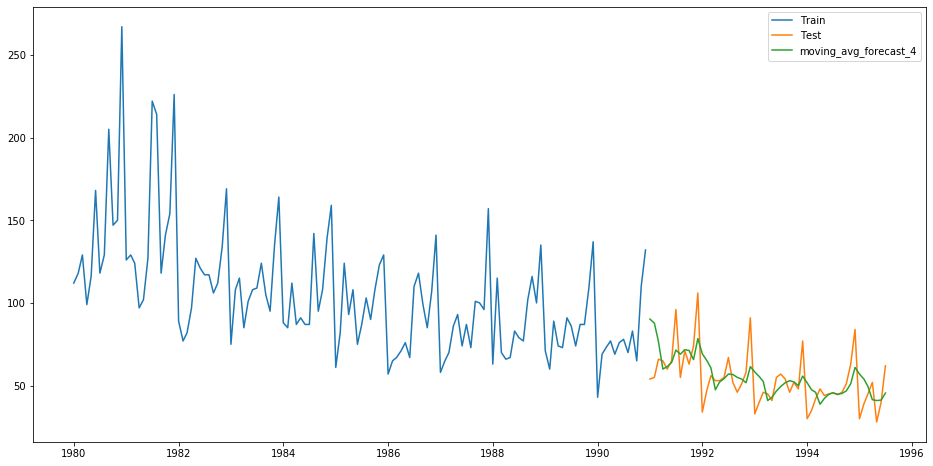

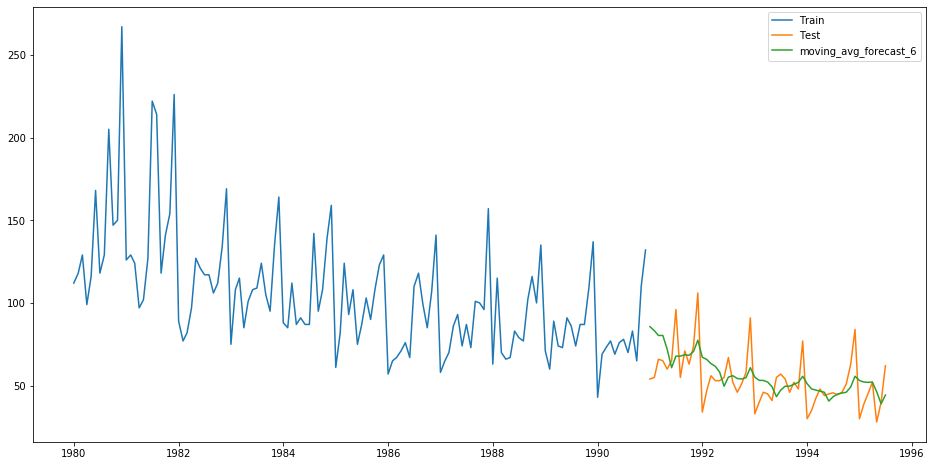

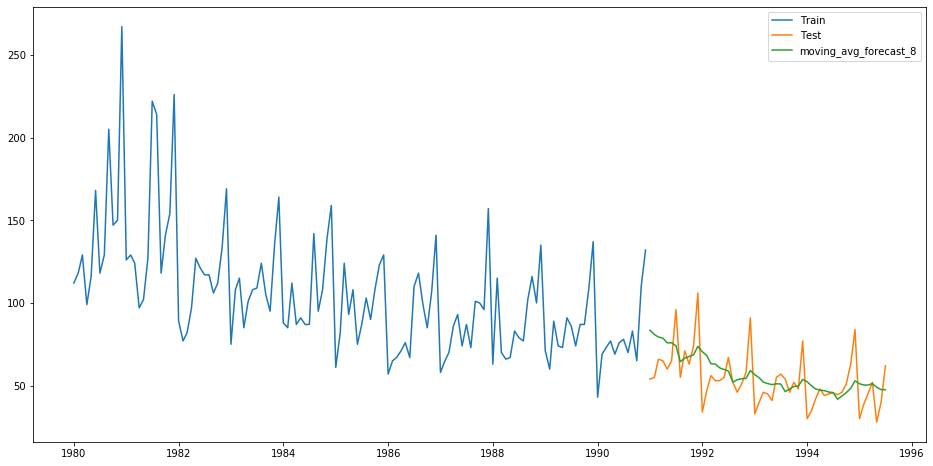

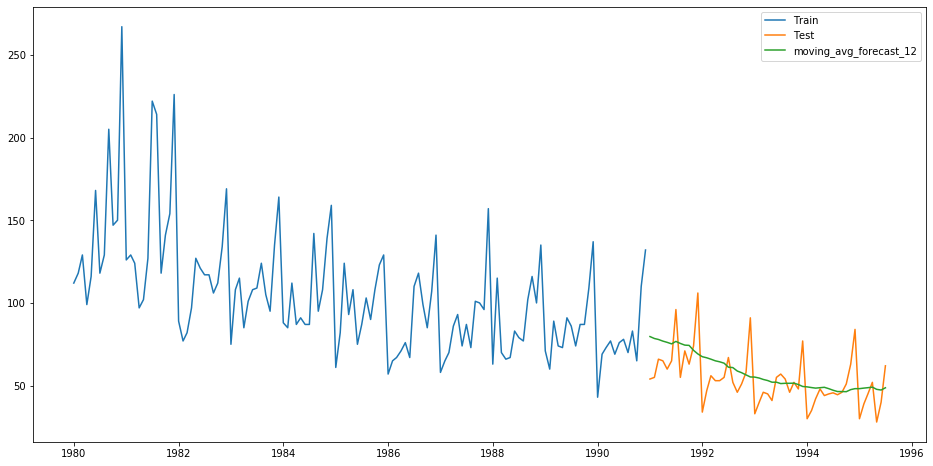

In [57]:
cols = ['moving_avg_forecast_4','moving_avg_forecast_6','moving_avg_forecast_8','moving_avg_forecast_12']

#Creating train and test set 
train=df[df.index.year <1991]
test=df[df.index.year >=1991]

y_hat_avg = test.copy()

for col_name in cols:
    
    plt.figure(figsize=(16,8))
    plt.plot(train['Rose'], label='Train')
    plt.plot(test['Rose'], label='Test')
    plt.plot(y_hat_avg[col_name], label = col_name)
    plt.legend(loc = 'best')

    rmse = sqrt(mean_squared_error(test.Rose, y_hat_avg[col_name]))
    rmse = round(rmse, 3)
    mape = MAPE(test.Rose, y_hat_avg[col_name])
    print("For Simple Average model, %s  RMSE is %3.3f MAPE is %3.2f" %(col_name, rmse, mape))
    
    #Defining the data frame with the model evaluation parameters

    tempResultsDf = pd.DataFrame({'Method':[col_name], 'rmse': [rmse], 'mape' : [mape]})
    resultsDf = pd.concat([resultsDf, tempResultsDf])

In [58]:
print(resultsDf)

                     Method    rmse    mape
0          RegressionOnTime  15.275   22.85
0  RegressionOnTimeSeasonal  13.913   20.35
0               Naive model  79.735  145.17
0            Simple Average  53.478   94.98
0     moving_avg_forecast_4  14.457   19.50
0     moving_avg_forecast_6  14.569   20.83
0     moving_avg_forecast_8  14.802   21.02
0    moving_avg_forecast_12  15.239   22.10


So Far RegressionOnTimeSeasonal  gives the lowest RMSE and MAPE

## Method 6: Simple Exponential Smoothing

In [59]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [60]:
# create class
model = SimpleExpSmoothing(train['Rose'])

In [61]:
model_fit = model.fit(optimized = True)

print('')
print('== Simple Exponential Smoothing ')
print('')

print('')
print('Smoothing Level', np.round(model_fit.params['smoothing_level'], 4))
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


== Simple Exponential Smoothing 


Smoothing Level 0.0987
Initial Level 134.387



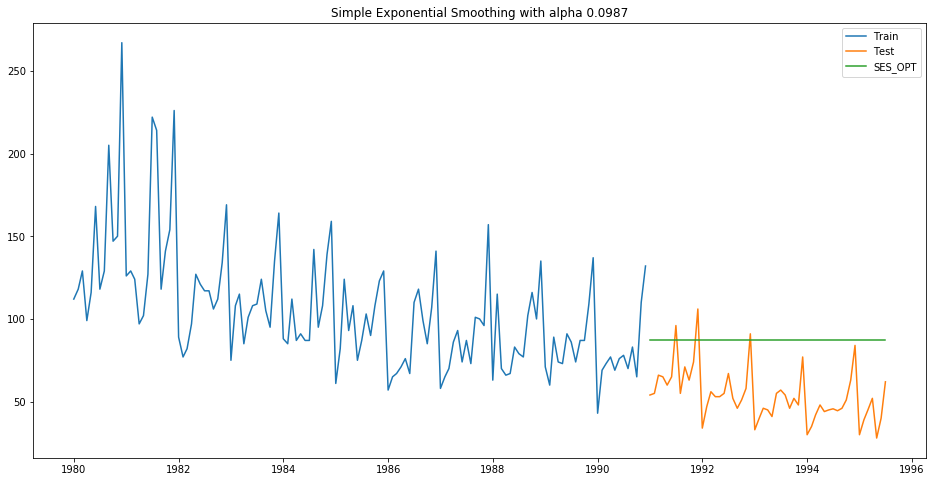

In [62]:
y_hat_avg['SES']     = model_fit.forecast(len(test['Rose']))

alpha_value          = np.round(model_fit.params['smoothing_level'], 4)


plt.figure(figsize=(16,8))
plt.plot(train.index, train['Rose'], label = 'Train')
plt.plot(test.index, test['Rose'],   label = 'Test')
plt.plot(test.index, y_hat_avg.SES,   label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

In [63]:
rmse_opt             =  np.sqrt(mean_squared_error(test['Rose'], y_hat_avg.SES))
mape_opt             =  MAPE(test['Rose'], y_hat_avg.SES)

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 0.10,  RMSE is 36.8136 MAPE is 63.93


In [64]:
tempResultsDf = pd.DataFrame({'Method': 'SES', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                     Method      rmse    mape
0          RegressionOnTime  15.27500   22.85
0  RegressionOnTimeSeasonal  13.91300   20.35
0               Naive model  79.73500  145.17
0            Simple Average  53.47800   94.98
0     moving_avg_forecast_4  14.45700   19.50
0     moving_avg_forecast_6  14.56900   20.83
0     moving_avg_forecast_8  14.80200   21.02
0    moving_avg_forecast_12  15.23900   22.10
0                       SES  36.81361   63.93


## Method 7: Holt's Linear Trend Method (Double Exponential Smoothing)

In [65]:
import statsmodels.api as sm

y_hat_avg = test.copy()
model_fit = Holt(np.asarray(train['Rose'])).fit(optimized = True)
y_hat_avg['Holt_linear'] = model_fit.forecast(len(test))

In [66]:
print('')
print('==Holt model Exponential Smoothing Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)

print('Smoothing Level', alpha_value )
print('Smoothing Slope', beta_value)
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


==Holt model Exponential Smoothing Parameters ==

Smoothing Level 0.1579
Smoothing Slope 0.1579
Initial Level 112.0



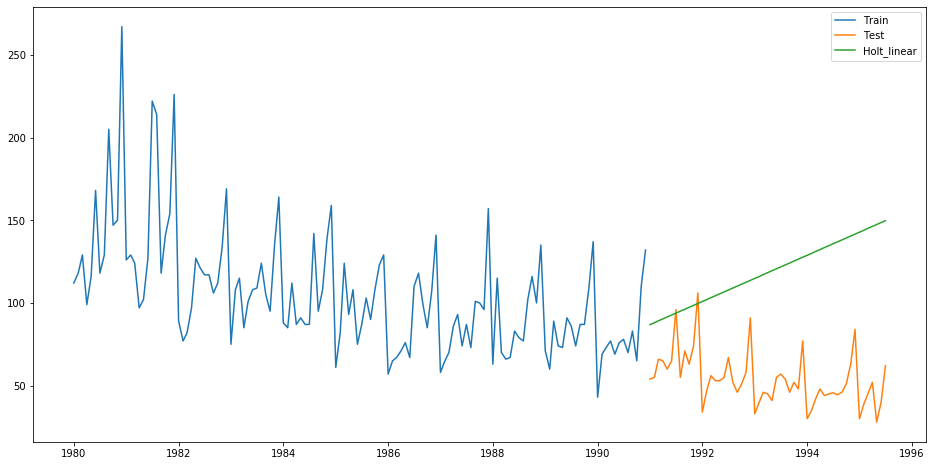

In [67]:
plt.figure(figsize=(16,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [68]:
rmse_opt             =  np.sqrt(mean_squared_error(test['Rose'], y_hat_avg['Holt_linear']))
mape_opt             =  MAPE(test['Rose'], y_hat_avg['Holt_linear'])

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 0.16,  RMSE is 70.5923 MAPE is 120.31


In [69]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_linear', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                     Method       rmse    mape
0          RegressionOnTime  15.275000   22.85
0  RegressionOnTimeSeasonal  13.913000   20.35
0               Naive model  79.735000  145.17
0            Simple Average  53.478000   94.98
0     moving_avg_forecast_4  14.457000   19.50
0     moving_avg_forecast_6  14.569000   20.83
0     moving_avg_forecast_8  14.802000   21.02
0    moving_avg_forecast_12  15.239000   22.10
0                       SES  36.813610   63.93
0               Holt_linear  70.592305  120.31


### Inference

The model is slightly better than SES model but worse than all moving average models.

## Method 8: Holt-Winters Method - Additive seasonality - Build this model and compare with the other models.

In [70]:
y_hat_avg = test.copy()
model_fit = ExponentialSmoothing(np.asarray(train['Rose']) ,seasonal_periods = 12 ,trend='add', seasonal='add').fit()

In [71]:
y_hat_avg['Holt_Winter'] = model_fit.forecast(len(test))

In [72]:
print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))
print('')


== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  0.1335
Smoothing Slope:  0.0138
Smoothing Seasonal:  0.0
Initial Level:  76.3871
Initial Slope:  0.0
Initial Seasons:  [ 38.6837  51.0181  58.9908  48.3259  57.1174  62.5433  72.4269  78.5
  74.4768  72.5434  90.6143 132.8645]



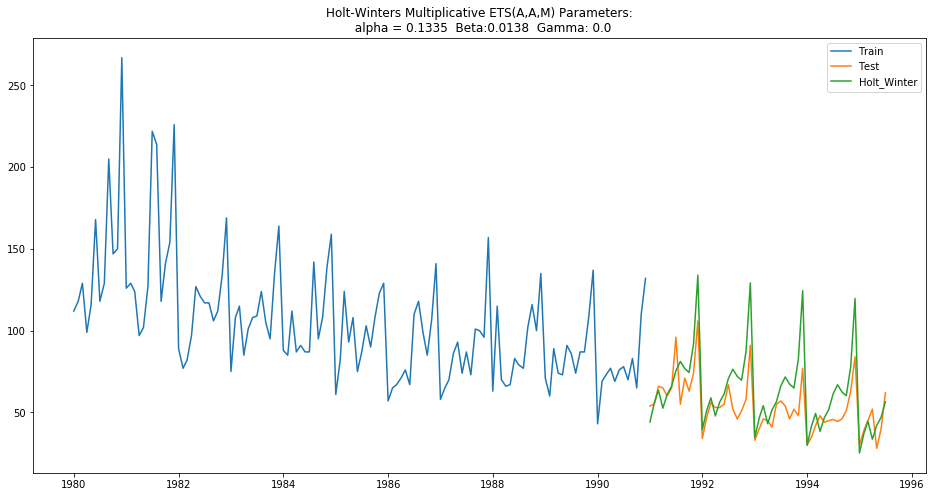

In [73]:
plt.figure(figsize=(16,8))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.title('Holt-Winters Multiplicative ETS(A,A,M) Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [74]:
rmse_opt             =  np.sqrt(mean_squared_error(test['Rose'], y_hat_avg['Holt_Winter']))
mape_opt             =  MAPE(test['Rose'], y_hat_avg['Holt_Winter'])

print("For alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f MAPE is %3.2f" %(alpha_value, beta_value, gamma_value, rmse_opt, mape_opt))

For alpha = 0.13, beta = 0.01, gamma = 0.00, RMSE is 16.4698 MAPE is 22.92


In [75]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_Winter', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                     Method       rmse    mape
0          RegressionOnTime  15.275000   22.85
0  RegressionOnTimeSeasonal  13.913000   20.35
0               Naive model  79.735000  145.17
0            Simple Average  53.478000   94.98
0     moving_avg_forecast_4  14.457000   19.50
0     moving_avg_forecast_6  14.569000   20.83
0     moving_avg_forecast_8  14.802000   21.02
0    moving_avg_forecast_12  15.239000   22.10
0                       SES  36.813610   63.93
0               Holt_linear  70.592305  120.31
0               Holt_Winter  16.469836   22.92


## Method 9: Holt-Winters Method - Multiplicative Model

In [76]:
y_hat_avg = test.copy()
model_fit = ExponentialSmoothing(np.asarray(train['Rose']) ,seasonal_periods = 12 ,trend='add', seasonal='Multiplicative').fit()

In [77]:
y_hat_avg['Holt_Winter_M'] = model_fit.forecast(len(test))

In [78]:
print('')
print('== Holt-Winters Multiplicative ETS(A,A,M) Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))
print('')


== Holt-Winters Multiplicative ETS(A,A,M) Parameters ==

Smoothing Level:  0.1061
Smoothing Slope:  0.0484
Smoothing Seasonal:  0.0
Initial Level:  76.6557
Initial Slope:  0.0
Initial Seasons:  [1.4755 1.6593 1.8057 1.5889 1.7782 1.926  2.1165 2.2514 2.1169 2.0811
 2.4093 3.3045]



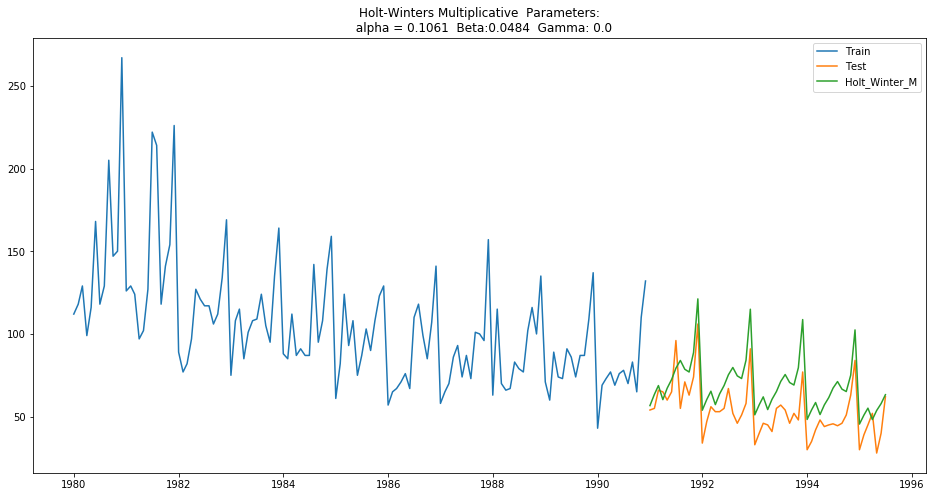

In [79]:
plt.figure(figsize=(16,8))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_hat_avg['Holt_Winter_M'], label='Holt_Winter_M')
plt.title('Holt-Winters Multiplicative  Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [80]:
rmse_opt             =  np.sqrt(mean_squared_error(test['Rose'], y_hat_avg['Holt_Winter_M']))
mape_opt             =  MAPE(test['Rose'], y_hat_avg['Holt_Winter_M'])

print("For alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f MAPE is %3.2f" %(alpha_value, beta_value, gamma_value, rmse_opt, mape_opt))

For alpha = 0.11, beta = 0.05, gamma = 0.00, RMSE is 17.3938 MAPE is 28.92


In [81]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_Winter M', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                     Method       rmse    mape
0          RegressionOnTime  15.275000   22.85
0  RegressionOnTimeSeasonal  13.913000   20.35
0               Naive model  79.735000  145.17
0            Simple Average  53.478000   94.98
0     moving_avg_forecast_4  14.457000   19.50
0     moving_avg_forecast_6  14.569000   20.83
0     moving_avg_forecast_8  14.802000   21.02
0    moving_avg_forecast_12  15.239000   22.10
0                       SES  36.813610   63.93
0               Holt_linear  70.592305  120.31
0               Holt_Winter  16.469836   22.92
0             Holt_Winter M  17.393777   28.92


# Inference

As of now, we observe that RegressionOnTimeSeasonal seems to be a good fit for the data.

##  Test Stationarity

In [82]:
train=rose[rose.index.year <1991]
test=rose[rose.index.year >=1991]

In [83]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

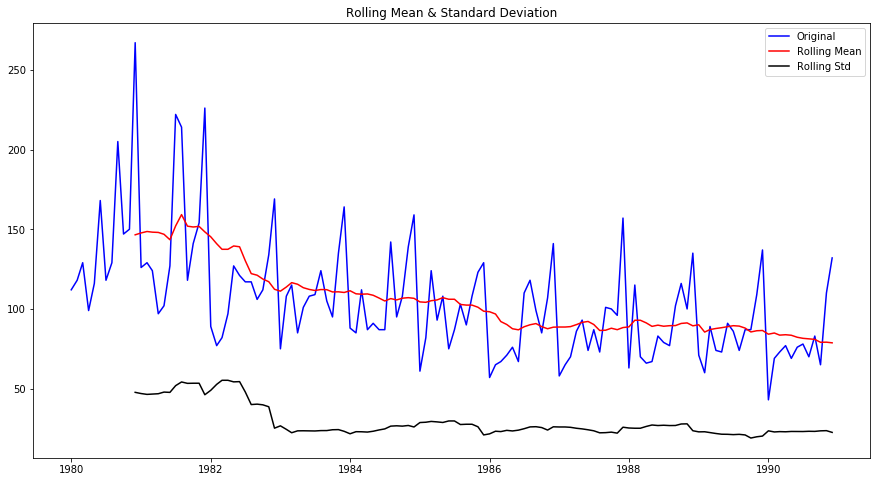

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [84]:
test_stationarity(train)

At 5% alpha, we can say that The time series is non stationary as the p-value >0.05 Hence, differentiation is required

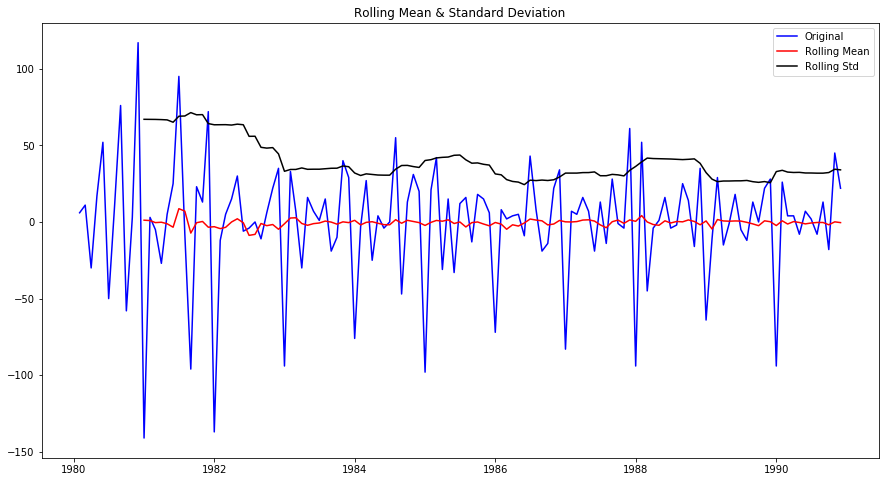

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [85]:
test_stationarity(train.diff().dropna())

## ARIMA

In [86]:
import itertools
p =  q = range(0, 3)
d=range(0, 2)

pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 1)(0, 0, 2, 12)
Model: (0, 0, 2)(0, 1, 0, 12)
Model: (0, 0, 2)(0, 1, 1, 12)


In [87]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
print(ARIMA_AIC)

Empty DataFrame
Columns: [param, AIC]
Index: []


In [88]:
train.tail(2)

,Rose
YearMonth,
1990-11-01,110.0
1990-12-01,132.0


In [89]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:1324.8997029577333
ARIMA(0, 0, 1) - AIC:1305.468405768463
ARIMA(0, 0, 2) - AIC:1306.5866794770147
ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464035
ARIMA(0, 1, 2) - AIC:1276.8353724115532
ARIMA(1, 0, 0) - AIC:1301.5463044353112
ARIMA(1, 0, 1) - AIC:1294.510585181699
ARIMA(1, 0, 2) - AIC:1292.0532102439645
ARIMA(1, 1, 0) - AIC:1319.3483105803125
ARIMA(1, 1, 1) - AIC:1277.7757488779507
ARIMA(1, 1, 2) - AIC:1277.3592330926072
ARIMA(2, 0, 0) - AIC:1302.3460741768874
ARIMA(2, 0, 1) - AIC:1292.9371945613286
ARIMA(2, 0, 2) - AIC:1292.2480553293067
ARIMA(2, 1, 0) - AIC:1300.609261174427
ARIMA(2, 1, 1) - AIC:1279.045689409309
ARIMA(2, 1, 2) - AIC:1279.2986939365255


In [90]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
5,"(0, 1, 2)",1276.835372
11,"(1, 1, 2)",1277.359233
10,"(1, 1, 1)",1277.775749
16,"(2, 1, 1)",1279.045689
17,"(2, 1, 2)",1279.298694
4,"(0, 1, 1)",1280.726183
8,"(1, 0, 2)",1292.053210
14,"(2, 0, 2)",1292.248055
13,"(2, 0, 1)",1292.937195
7,"(1, 0, 1)",1294.510585


In [112]:
## ARIMA(2,0,2) has the lowest AIC
mod = ARIMA(train, order=(0,1,2))

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Sun, 26 Jul 2020   AIC                           1276.835
Time:                        16:02:59   BIC                           1288.336
Sample:                    02-01-1980   HQIC                          1281.509
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

In [113]:
test.shape

(55, 1)

In [114]:
test= test.astype(float)
final_hat_avg =test.copy()
pred_Arima = results_Arima.forecast(steps=55)

In [115]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test,pred_Arima[0],squared=False)
print(rmse)

15.62369038064324


In [116]:
resultsDf1 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])

resultsDf1

,RMSE
"ARIMA(0,1,2)",15.62369


In [117]:
tempResultsDf = pd.DataFrame({'Method': 'ARIMA(0,1,2)', 'rmse': [rmse]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                     Method       rmse    mape
0          RegressionOnTime  15.275000   22.85
0  RegressionOnTimeSeasonal  13.913000   20.35
0               Naive model  79.735000  145.17
0            Simple Average  53.478000   94.98
0     moving_avg_forecast_4  14.457000   19.50
0     moving_avg_forecast_6  14.569000   20.83
0     moving_avg_forecast_8  14.802000   21.02
0    moving_avg_forecast_12  15.239000   22.10
0                       SES  36.813610   63.93
0               Holt_linear  70.592305  120.31
0               Holt_Winter  16.469836   22.92
0             Holt_Winter M  17.393777   28.92
0   SARIMA(0,1,2)(2,1,2,12)  15.580772     NaN
0              ARIMA(0,1,2)  15.623690     NaN


## SARIMA

In [96]:
### As the dataset has seasonality.. Let's build the model with SARIMA

SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
print(SARIMA_AIC)

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []


In [97]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1607.5307543879908
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1342.8879796320243
SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:1127.6939671247937
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1132.3491004641107
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:973.2839647242731
SARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:819.263258315186
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1123.327544387293
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1072.6552135799577
SARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:947.5166315956768
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:982.5608243528003
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:970.9074505848823
SARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC:821.1204806447909
SARIMA(0, 0, 0)x(2, 0, 0, 12) - AIC:939.9681316162018
SARIMA(0, 0, 0)x(2, 0, 1, 12) - AIC:941.4830987726748
SARIMA(0, 0, 0)x(2, 0, 2, 12) - AIC:931.526865994022
SARIMA(0, 0, 0)x(2, 1, 0, 12) - AIC:828.5116218528786
SARIMA(0, 0, 0)x(2, 1, 1, 12) - AIC:822.8736935508155
SARIMA(0, 0, 0)x(2, 1, 2, 12) - AIC:814.9165424863874
SARIMA(0, 0, 1)x(0, 0, 0,

SARIMA(1, 0, 2)x(1, 0, 2, 12) - AIC:915.1883595100368
SARIMA(1, 0, 2)x(1, 1, 0, 12) - AIC:934.42429869993
SARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC:919.5722547209538
SARIMA(1, 0, 2)x(1, 1, 2, 12) - AIC:788.3877540304203
SARIMA(1, 0, 2)x(2, 0, 0, 12) - AIC:914.6874397121487
SARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:932.0304670068224
SARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:900.2595949045349
SARIMA(1, 0, 2)x(2, 1, 0, 12) - AIC:809.1023799335043
SARIMA(1, 0, 2)x(2, 1, 1, 12) - AIC:808.5333666205419
SARIMA(1, 0, 2)x(2, 1, 2, 12) - AIC:781.0077113765934
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.2955447585719
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.9405391257686
SARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1164.510301384203
SARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:953.8813887547343
SARIMA(1, 1, 0)x(0, 1, 2, 12) - AIC:828.8398832821197
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.8860786804557
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.4080055024747
SARIMA(1, 1, 0)x(1, 0, 2, 1

SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:784.8928053201853
SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:785.8335673020377
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.9102116146687
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.964355259821
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311107577
SARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC:1099.4823964819768
SARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:904.7004130355183
SARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:784.1428769952632
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713702283
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909353375177
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488803975
SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:925.3705667270506
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:915.6932534544937
SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:786.0000879872055
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464439911958
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781891889461
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6687983603701
SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:794.7799442946334
SARIMA(2, 1, 2)x(2, 1, 1

In [98]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
107,"(0, 1, 2)","(2, 1, 2, 12)",774.969120
215,"(1, 1, 2)","(2, 1, 2, 12)",776.940110
323,"(2, 1, 2)","(2, 1, 2, 12)",778.328478
161,"(1, 0, 2)","(2, 1, 2, 12)",781.007711
269,"(2, 0, 2)","(2, 1, 2, 12)",781.941939


In [118]:
## SARIMA
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(0,1,2),
                                seasonal_order=(2, 1, 2, 12),
                    
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -540.593
Date:                            Sun, 26 Jul 2020   AIC                           1095.185
Time:                                    16:04:19   BIC                           1114.639
Sample:                                01-01-1980   HQIC                          1103.085
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8541      0.137     -6.255      0.000      -1.122      -0.586
ma.L2         -0.2365      0.098   

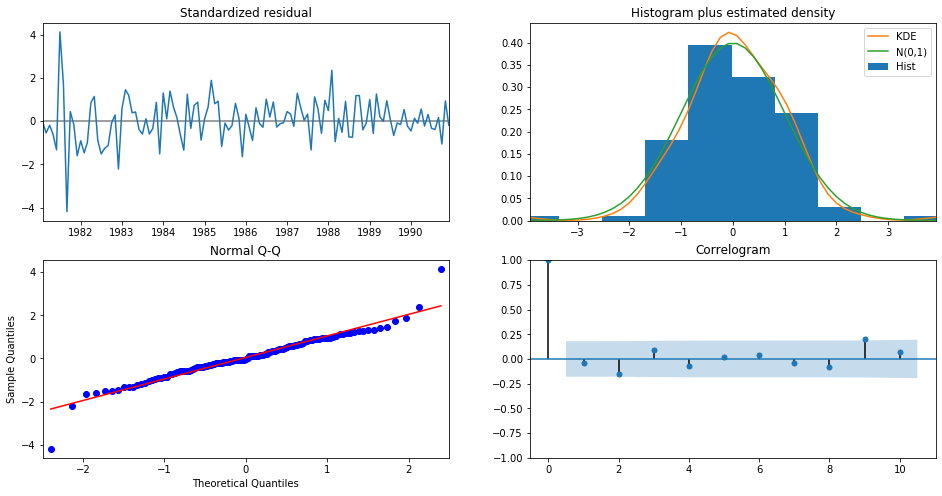

In [119]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

In [120]:
test= test.astype(float)
final_hat_avg =test.copy()
pred_Sarima = results_SARIMA.get_forecast(steps=55)
pred_Sarima.predicted_mean

1991-01-01     45.210679
1991-02-01     62.815566
1991-03-01     61.892236
1991-04-01     59.512874
1991-05-01     61.016297
1991-06-01     68.520426
1991-07-01     68.279203
1991-08-01     69.207580
1991-09-01     81.808722
1991-10-01     76.938756
1991-11-01     93.962885
1991-12-01    127.352410
1992-01-01     42.213525
1992-02-01     56.815717
1992-03-01     65.688830
1992-04-01     58.916068
1992-05-01     60.041787
1992-06-01     63.391066
1992-07-01     71.635190
1992-08-01     65.926458
1992-09-01     71.675079
1992-10-01     71.086800
1992-11-01     90.700276
1992-12-01    122.068398
1993-01-01     35.151045
1993-02-01     53.427377
1993-03-01     52.794458
1993-04-01     51.406879
1993-05-01     51.682186
1993-06-01     59.270105
1993-07-01     59.016074
1993-08-01     59.016938
1993-09-01     71.917026
1993-10-01     65.177256
1993-11-01     85.763455
1993-12-01    117.737632
1994-01-01     32.447161
1994-02-01     47.309342
1994-03-01     55.244860
1994-04-01     48.852165


In [121]:
pred_Sarima.summary_frame()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,45.210679,21.565220,2.943625,87.477733
1991-02-01,62.815566,22.448753,18.816819,106.814313
1991-03-01,61.892236,22.522334,17.749272,106.035200
1991-04-01,59.512874,22.595676,15.226162,103.799586
1991-05-01,61.016297,22.668781,16.586303,105.446292
1991-06-01,68.520426,22.741651,23.947609,113.093242
1991-07-01,68.279203,22.814288,23.564021,112.994385
1991-08-01,69.207580,22.886694,24.350484,114.064676
1991-09-01,81.808722,22.958872,36.810159,126.807284
1991-10-01,76.938756,23.030824,31.799170,122.078341


In [122]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test ,pred_Sarima.predicted_mean))
print(rmse)

15.580771816054948


In [104]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,1,2,12)'])

resultsDf1 = pd.concat([resultsDf1, temp_resultsDf])
resultsDf1

,RMSE
"ARIMA(0,1,2)",15.623690
"SARIMA(0,1,2)(2,1,2,12)",15.580772


In [108]:
resultsDf

,Method,rmse,mape
0,RegressionOnTime,15.275000,22.85
0,RegressionOnTimeSeasonal,13.913000,20.35
0,Naive model,79.735000,145.17
0,Simple Average,53.478000,94.98
0,moving_avg_forecast_4,14.457000,19.50
0,moving_avg_forecast_6,14.569000,20.83
0,moving_avg_forecast_8,14.802000,21.02
0,moving_avg_forecast_12,15.239000,22.10
0,SES,36.813610,63.93
0,Holt_linear,70.592305,120.31


In [111]:
tempResultsDf = pd.DataFrame({'Method': 'SARIMA(0,1,2)(2,1,2,12)', 'rmse': [rmse]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                     Method       rmse    mape
0          RegressionOnTime  15.275000   22.85
0  RegressionOnTimeSeasonal  13.913000   20.35
0               Naive model  79.735000  145.17
0            Simple Average  53.478000   94.98
0     moving_avg_forecast_4  14.457000   19.50
0     moving_avg_forecast_6  14.569000   20.83
0     moving_avg_forecast_8  14.802000   21.02
0    moving_avg_forecast_12  15.239000   22.10
0                       SES  36.813610   63.93
0               Holt_linear  70.592305  120.31
0               Holt_Winter  16.469836   22.92
0             Holt_Winter M  17.393777   28.92
0   SARIMA(0,1,2)(2,1,2,12)  15.580772     NaN


In [123]:
## To get the real forecast for 7 days, we will rerun the model on the complete dataset

mod = sm.tsa.statespace.SARIMAX(rose['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -762.838
Date:                            Sun, 26 Jul 2020   AIC                           1539.677
Time:                                    16:04:49   BIC                           1561.790
Sample:                                01-01-1980   HQIC                          1548.647
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8416      0.100     -8.397      0.000      -1.038      -0.645
ma.L2         -0.2498      0.073   

In [124]:
pred = results.get_forecast(steps=12)
pred.predicted_mean

1995-08-01    44.783453
1995-09-01    42.209967
1995-10-01    43.868501
1995-11-01    53.279469
1995-12-01    82.711586
1996-01-01    18.594200
1996-02-01    27.591457
1996-03-01    34.338792
1996-04-01    35.635841
1996-05-01    28.809437
1996-06-01    35.011906
1996-07-01    45.378001
Freq: MS, dtype: float64

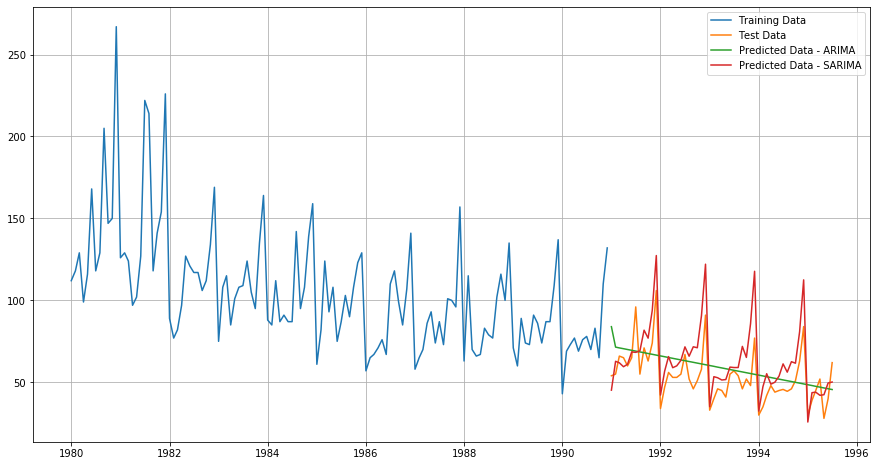

In [125]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_Arima[0],label='Predicted Data - ARIMA')
plt.plot(test.index,pred_Sarima.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

## Building the iterations of the models based on the ACF and PACF plots.

### SARIMA Model

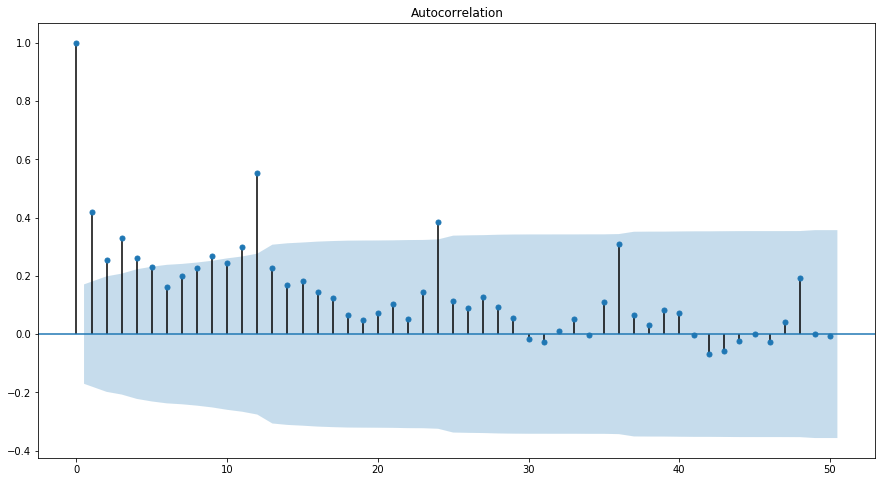

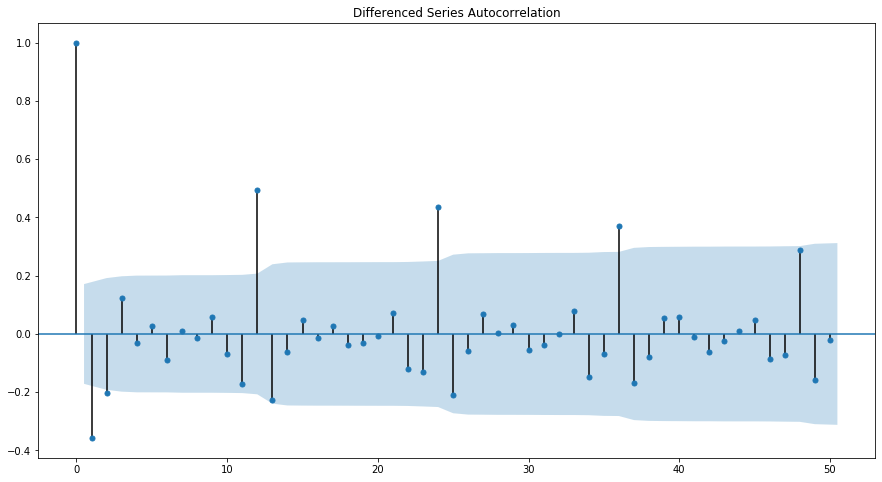

In [126]:
rcParams['figure.figsize'] = 15,8
plot_acf(train['Rose'],lags=50)
plot_acf(train['Rose'].diff().dropna(),lags=50,title='Differenced Series Autocorrelation')
plt.show()

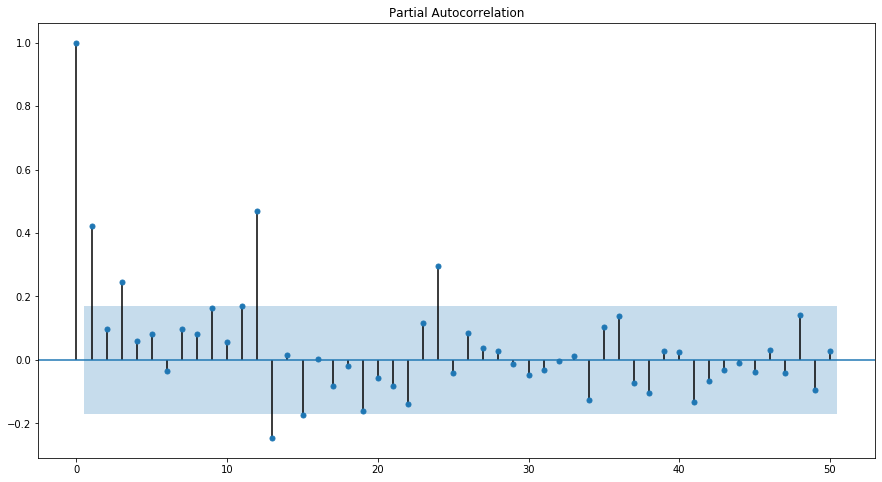

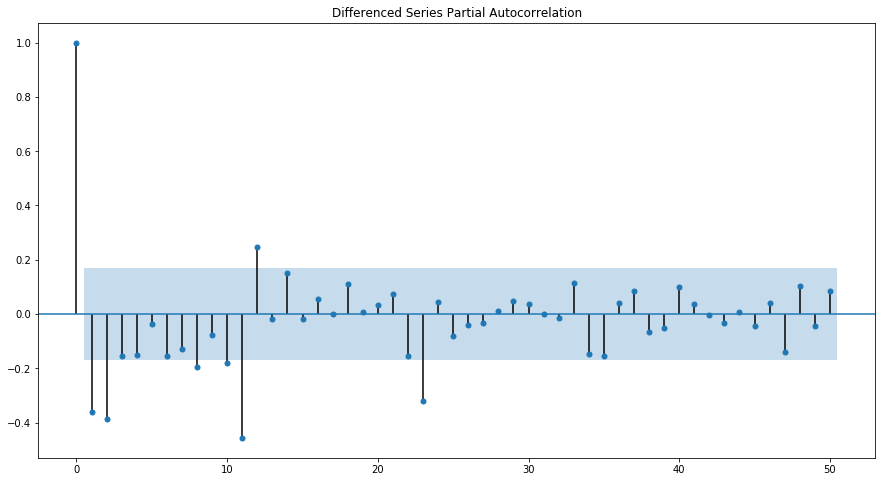

In [127]:
plot_pacf(train['Rose'],lags=50)
plot_pacf(train['Rose'].diff().dropna(),lags=50,title='Differenced Series Partial Autocorrelation')
plt.show()

In [128]:
mod = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = mod.fit(maxiter=100000)
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -596.231
Date:                            Sun, 26 Jul 2020   AIC                           1206.462
Time:                                    16:06:12   BIC                           1226.588
Sample:                                01-01-1980   HQIC                          1214.640
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6955      0.086     -8.059      0.000      -0.865      -0.526
ma.L2         -0.2233      0.094   

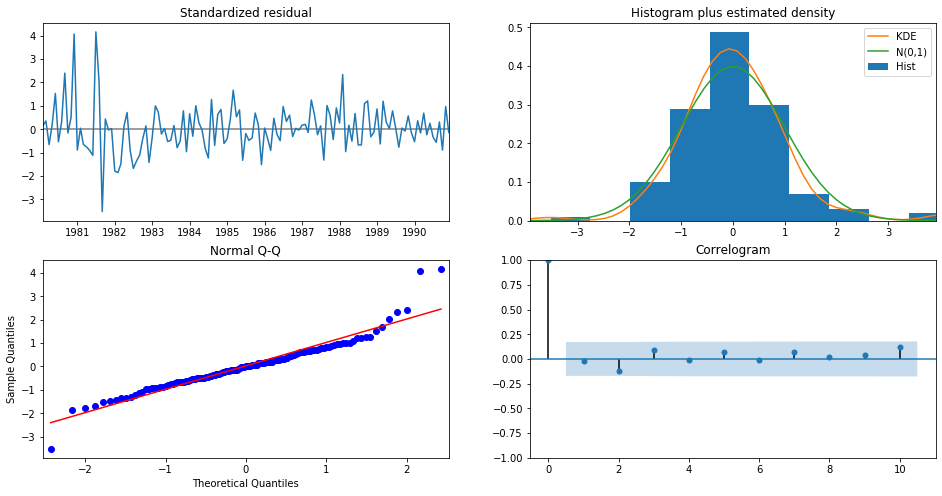

In [129]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Predict on the Test Set using this model and evaluate the model.

In [130]:
pred = results.get_forecast(steps=len(test))
pred.predicted_mean

1991-01-01     45.565039
1991-02-01     60.801555
1991-03-01     62.047399
1991-04-01     57.652152
1991-05-01     61.551859
1991-06-01     67.408878
1991-07-01     69.848121
1991-08-01     73.907962
1991-09-01     79.373454
1991-10-01     74.097348
1991-11-01     91.597352
1991-12-01    125.419069
1992-01-01     43.084460
1992-02-01     54.970180
1992-03-01     63.669289
1992-04-01     54.785480
1992-05-01     59.314991
1992-06-01     61.556982
1992-07-01     71.301480
1992-08-01     70.851355
1992-09-01     69.908139
1992-10-01     69.807050
1992-11-01     86.190301
1992-12-01    118.936869
1993-01-01     36.691860
1993-02-01     50.858855
1993-03-01     52.583145
1993-04-01     47.977499
1993-05-01     51.836713
1993-06-01     57.323876
1993-07-01     60.206085
1993-08-01     63.873759
1993-09-01     68.788451
1993-10-01     63.975514
1993-11-01     81.026633
1993-12-01    114.054198
1994-01-01     33.481578
1994-02-01     45.268390
1994-03-01     53.309380
1994-04-01     44.904911


In [131]:
rmse = mean_squared_error(test['Rose'],pred.predicted_mean,squared=False)
print(rmse)

14.27939540404599


In [132]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0, 1, 2)(2, 0, 2, 12)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

,RMSE
"ARIMA(0,1,2)",15.623690
"SARIMA(0, 1, 2)(2, 0, 2, 12)",14.279395


In [133]:
tempResultsDf = pd.DataFrame({'Method': 'SARIMA(0, 1, 2)(2, 0, 2, 12)', 'rmse': [rmse]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                         Method       rmse    mape
0              RegressionOnTime  15.275000   22.85
0      RegressionOnTimeSeasonal  13.913000   20.35
0                   Naive model  79.735000  145.17
0                Simple Average  53.478000   94.98
0         moving_avg_forecast_4  14.457000   19.50
0         moving_avg_forecast_6  14.569000   20.83
0         moving_avg_forecast_8  14.802000   21.02
0        moving_avg_forecast_12  15.239000   22.10
0                           SES  36.813610   63.93
0                   Holt_linear  70.592305  120.31
0                   Holt_Winter  16.469836   22.92
0                 Holt_Winter M  17.393777   28.92
0       SARIMA(0,1,2)(2,1,2,12)  15.580772     NaN
0                  ARIMA(0,1,2)  15.623690     NaN
0  SARIMA(0, 1, 2)(2, 0, 2, 12)  14.279395     NaN


### Building Forecast for 12 months

In [168]:
## To get the real forecast for 7 days, we will rerun the model on the complete dataset

mod = sm.tsa.statespace.SARIMAX(rose['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -817.417
Date:                            Sun, 26 Jul 2020   AIC                           1648.834
Time:                                    16:40:28   BIC                           1671.415
Sample:                                01-01-1980   HQIC                          1657.985
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6975      0.061    -11.439      0.000      -0.817      -0.578
ma.L2         -0.2163      0.070   

In [169]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1995-07-01'), dynamic=True, full_results=True)

In [170]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [171]:
pred95 = results.get_forecast(steps=12, alpha=0.05)
pred_ci_95 = pred95.conf_int()

In [172]:
pred_ci_95

,lower Rose,upper Rose
1995-08-01,7.903466,80.989156
1995-09-01,4.666423,81.022290
1995-10-01,5.699508,82.314546
1995-11-01,15.131017,92.004352
1995-12-01,42.071756,119.202604
1996-01-01,-18.064314,59.322892
1996-02-01,-9.576611,68.066317
1996-03-01,-3.515433,74.382376
1996-04-01,-2.714158,75.437703
1996-05-01,-9.188291,69.216797


In [173]:
forecast_fullmodel_sarimax = pred95.predicted_mean

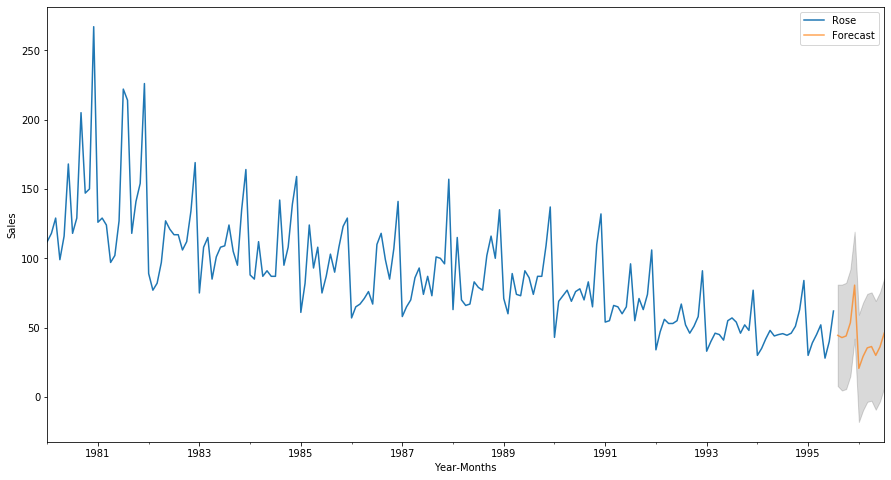

In [175]:
# plot the forecast along with the confidence band

axis = rose.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_sarimax.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(forecast_fullmodel_sarimax.index, pred_ci_95['lower Rose'], pred_ci_95['upper Rose'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()